**Author:** Batjargal (Alex) Bayarsaikhan <br/>
**Date:** July 17-18, 2018

# Statement

This exercise provides a  few datasets in csv format of student performance data derived from the University of Minho, Portugal. The task is a series of analytics questions focused on understanding the data and its relation to predicting the target (G3 >= 10).

The Task:

- You can use either the Math(student-mat) or Portuguese(student-por) dataset.
- Perform some simple exploratory analysis and generate summary statistics to get a sense of what is in the data.
- Describe the quality of the data.
- Generate a few charts that you feel conveys 2 or more important relationships in the data.
- Describe the relationship of the attributes with the final year scores(G1, G2, G3) and share any interesting insights you’ve found.
- Build a model to predict whether a given student is going to pass G3(score >= 10).
- Write all of this into a python notebook, upload to a git repo, and share the link with us to review.  Be prepared to discuss your methodologies and approach.
 

 

Context:
- Assume the audience for your write-up is a non-technical stakeholder.
- Assume the audience for your code is a colleague who may need to read or modify it in the future.

# Part 1 - Analyzing and visualizing student performance data

## Importing libraries 

In [827]:
import pandas as pd # a library for data manipulation and analysis
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder       
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # Feature Scaling

#libraries for chart
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

## Defining a class for student performance report 

In [828]:
#class for presenting student performance report
class StudentPerformanceReport(object):    
    def __init__(self, title, filename, sep=';', constants={}):
        """Initialize the class.
        
        Parameters:
            filename -- path of a file
            sep -- the imaginary part (default ';')            
            
        """
        self.title = title if title else ''
        self.filename = filename
        self.separator = sep
        self.constants = constants
        
        #for storing all data for presenting a report
        self.report_object = {}
        
        # helper variables for presenting report
        self.pre_space = '   '
        
        # defining constant values for report visualization
        self.constants = { 
            'school_GP': 'Gabriel Pereira',
            'school_MS': 'Mousinho da Silveira',
            'gender_F': 'Female',
            'gender_M': 'Male',
            'grade_G1': 'First Period',
            'grade_G2': 'Second Period',
            'grade_G3': 'Final',
            'student_top' : 'Higher than 80%',
            'student_avg' : 'Between 50-80%',
            'student_low' : 'Lower than 50%',
        }
        self.constants.update(constants)
        
        pass
        
    def performAnalysis(self):
        """ to perform analysis on a file data """
        # reading csv file using pandas' read_csv function
        self.student_dataframe = pd.read_csv(self.filename, sep= self.separator)
    
        # using default summary function of pandas library
        self.default_summary = self.student_dataframe.describe()
        
        # to find average, max, min of student age 
        student_age_average = self.default_summary.loc['mean']['age'];
        student_age_max = self.default_summary.loc['max']['age'];
        student_age_min = self.default_summary.loc['min']['age'];
        
        # to find total number of students    
        total_number_of_students = len(self.student_dataframe)
                
        # to find number of studens by school, gender, age    
        number_of_students_by_school = {}
        number_of_students_by_gender = {}
        number_of_students_by_age = {}
        
        for school, indices in self.student_dataframe.groupby('school').groups.items():
            number_of_students_by_school['school_' + school] = len(indices)
            
        for gender, indices in self.student_dataframe.groupby('sex').groups.items():
            number_of_students_by_gender['gender_' + gender] = len(indices)
            
        for age, indices in self.student_dataframe.groupby('age').groups.items():
            number_of_students_by_age[age] = len(indices)
        
        # to find average, max, min of grades
        avg_grades = self.__findAverageGrades()  
        
        # to store the information to report object
        self.report_object['number_of_students_by_school'] = number_of_students_by_school
        self.report_object['number_of_students_by_gender'] = number_of_students_by_gender
        self.report_object['number_of_students_by_age'] = number_of_students_by_age        
        
        self.report_object['total_number_of_students'] = total_number_of_students
        
        self.report_object['student_age_average'] = student_age_average
        self.report_object['student_age_max'] = student_age_max
        self.report_object['student_age_min'] = student_age_min
        
        df = self.student_dataframe
        self.report_object['num_of_stud_higher_80'] = len(df [ df['G3'] >= 16 ])
        self.report_object['num_of_stud_between_50_80'] = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        self.report_object['num_of_stud_lower_50'] = len(df [ df['G3'] < 10 ])
        
        self.report_object.update(avg_grades)
        
        pass
        
    def __findAverageGrades(self):
        avg_grades = {
            'grade_G1_mean' : self.default_summary.loc['mean']['G1'] / 20 * 100,
            'grade_G2_mean' : self.default_summary.loc['mean']['G2'] / 20 * 100,
            'grade_G3_mean' : self.default_summary.loc['mean']['G3'] / 20 * 100,
            
            'grade_G1_max' : self.default_summary.loc['max']['G1'],
            'grade_G2_max' : self.default_summary.loc['max']['G2'],
            'grade_G3_max' : self.default_summary.loc['max']['G3'],
            
            'grade_G1_min' : self.default_summary.loc['min']['G1'],
            'grade_G2_min' : self.default_summary.loc['min']['G2'],
            'grade_G3_min' : self.default_summary.loc['min']['G3']            
        }
        return avg_grades
    
    def drawGraphs(self):
        
        legends = [self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']]
        data_for_graphs = self.__prepareDataForGraph()
        
        print('', end='\n')
        print('Visualization:')
        print('-----------------------')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)  
        
        data_for_graphs['num_stud_by_grade'].plot(kind='pie', y=0, autopct='%.2f', title='Percentage of students by grade \n', ax=axes[0])
        data_for_graphs['studytime'].plot(kind='bar', title='Weekly study time by grade \n', fontsize=10, ax=axes[1])
        
                
        data_correlations = data_for_graphs['correlations']
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=2)        

        axes_subplot_top = data_correlations['grades_corr_top'][:5].plot(kind='bar', ax=axes[0], title='Key factors of Top studens \n whose grades higher than 80% \n')
        axes_subplot_low = data_correlations['grades_corr_low'][:5].plot(kind='bar', ax=axes[1], title='Key factors of Low studens \n whose grades less than 50% \n')
        
        fig = plt.figure(figsize=(12,4))
        axes = fig.subplots(nrows=1, ncols=1)
        axes_subplot_avg = data_correlations['grades_corr_avg'].drop(['school', 'age', 'sex', 'guardian']).plot(kind='bar', stacked=True, ax=axes, title='Compare to average students factors \n')
                        
        axes_subplot_top.legend(legends)
        axes_subplot_avg.legend(legends)
        axes_subplot_low.legend(legends)
        
        pass
    
    def __prepareDataForGraph(self):
                
        grade_columns = ['G1', 'G2', 'G3']
        df = self.student_dataframe.copy()
        
        
        num_of_stud_higher_80 = len(df [ df['G3'] >= 16 ])
        num_of_stud_between_50_80 = len(df [ (9 < df['G3']) & (df['G3'] < 16) ])
        num_of_stud_lower_50 = len(df [ df['G3'] < 10 ])
        
        
        df_num_stud_by_grade = pd.DataFrame([num_of_stud_higher_80, num_of_stud_between_50_80, num_of_stud_lower_50],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']])
        
        temp_array_for_encoder = df.iloc[:, :].values

        # Encoding categorical data
        dic_label_encoders = {}

        for column in df.select_dtypes(include=['object']).columns:
            dic_label_encoders[column] = LabelEncoder()
            df[column] = dicLabelEncoders[column].fit_transform(temp_array_for_encoder[:, self.__columnIndexByName(column)])

        df_top_students = df [ df['G3'] >= 16 ].copy()
        correlations_top = df_top_students[df_top_students.columns].corr().drop(grade_columns)
        correlations_G3_top = correlations_top.sort_values('G3', ascending=False)['G3'].rename('G3_top')

        df_average_students = df [ (9 < df['G3']) & (df['G3'] < 16) ].copy() 
        correlations_average = df_average_students[df_average_students.columns].corr().drop(grade_columns)
        correlations_G3_average = correlations_average.sort_values('G3', ascending=False)['G3'].rename('G3_avg')

        df_low_students = df [ df['G3'] < 10 ].copy()
        correlations_low = df_low_students[df_low_students.columns].corr().drop(grade_columns)
        correlations_G3_low = correlations_low.sort_values('G3', ascending=False)['G3'].rename('G3_low')
        
        # combine 3 Series into one dataframe
        df_correlations = pd.concat([correlations_G3_top, correlations_G3_average, correlations_G3_low], axis=1)
        grades_corr_top = df_correlations.sort_values('G3_top', ascending=False)
        grades_corr_avg = df_correlations.sort_values('G3_avg', ascending=False)
        grades_corr_low = df_correlations.sort_values('G3_low', ascending=False)
                            
        # fill missing value by row average        
        grades_corr_top = grades_corr_top.T.fillna(grades_corr_top.mean(axis=1)).T
        grades_corr_avg = grades_corr_avg.T.fillna(grades_corr_avg.mean(axis=1)).T
        grades_corr_low = grades_corr_low.T.fillna(grades_corr_low.mean(axis=1)).T
        
        # to use scaling
        sc = MinMaxScaler()  #StandardScaler()        
        
        grades_corr_top = pd.DataFrame(sc.fit_transform(grades_corr_top.values), index=grades_corr_top.index, columns=grades_corr_top.columns)
        grades_corr_avg = pd.DataFrame(sc.fit_transform(grades_corr_avg.values), index=grades_corr_avg.index, columns=grades_corr_avg.columns)
        grades_corr_low = pd.DataFrame(sc.fit_transform(grades_corr_low.values), index=grades_corr_low.index, columns=grades_corr_low.columns)

        
        #Analysizing Study time
        df_study_time_top = df [ df['G3'] >= 16 ]['studytime'].copy()
        df_study_time_avg = df [ (9 < df['G3']) & (df['G3'] < 16)]['studytime'].copy()
        df_study_time_low = df [ df['G3'] < 10 ]['studytime'].copy()
        
        
        #studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)        
        def calculateStudyTime(value):
            if value == 4:
                return 14
            elif value == 3:
                return 8
            elif value == 2:
                return 3.5
            else: #1
                return 1.5

        study_time_top = df_study_time_top.apply(calculateStudyTime).mean()
        study_time_avg = df_study_time_avg.apply(calculateStudyTime).mean()
        study_time_low = df_study_time_low.apply(calculateStudyTime).mean()
        
        df_study_time = pd.DataFrame([study_time_top, study_time_avg, study_time_low],
                                     index=[self.constants['student_top'], self.constants['student_avg'], self.constants['student_low']])
        
        data_for_graphs = {
            'correlations' : {
                'grades_corr_top' : grades_corr_top,
                'grades_corr_avg' : grades_corr_avg,
                'grades_corr_low' : grades_corr_low
            },
            'studytime' : df_study_time,
            'num_stud_by_grade' : df_num_stud_by_grade
        }
        return data_for_graphs
    
    def __columnIndexByName(self, column_name):
        i = 0
        for name in self.student_dataframe.columns:
            if name == column_name:
                break
            i+=1
        return i
                
    def generateSummary(self):
        """Print summary information of the report object to console
        """
        
        str_filled_frame = '*'.zfill(len(self.title) + 8).replace('0', '*')
        
        print(str_filled_frame)
        print('*** {} ***'.format(self.title))
        print(str_filled_frame)
        print('', end='\n')
        
        print('General information:')
        print('-----------------------')
        print('{}Total number of students: {}'.format(self.pre_space, self.report_object['total_number_of_students']))
        
        print('{}Number of students by gender:'.format(self.pre_space))
        for gender, number in self.report_object['number_of_students_by_gender'].items():
            school = self.constants[gender] if gender in self.constants else gender
            print('       {}: {}'.format(school, number))
        
        print('{}Number of students by school:'.format(self.pre_space))
        for school, number in self.report_object['number_of_students_by_school'].items():
            school = self.constants[school] if school in self.constants else school
            print('       {}: {}'.format(school, number))   
            
        print('', end='\n')
        print('Performance indicators:')
        print('-----------------------')
        print('{}Average grades of total studens:'.format(self.pre_space))
        
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G1'], self.report_object['grade_G1_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G2'], self.report_object['grade_G2_mean']))
        print('{0}{1}: {2:.2f} %'.format(self.pre_space * 2, self.constants['grade_G3'], self.report_object['grade_G3_mean']))
                
        print('{}Number of students by grade:'.format(self.pre_space))
        
        print('{}Higher than 80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_higher_80']))
        print('{}Between 50-80%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_between_50_80']))
        print('{}Lower than 50%: {}'.format(self.pre_space * 2, self.report_object['num_of_stud_lower_50']))
        
        pass
        
        

## Usage of  StudentPerformanceReport class

***************************************
*** Math Student Performance Report ***
***************************************

General information:
-----------------------
   Total number of students: 395
   Number of students by gender:
       Female: 208
       Male: 187
   Number of students by school:
       Gabriel Pereira: 349
       Mousinho da Silveira: 46

Performance indicators:
-----------------------
   Average grades of total studens:
      First Period: 54.54 %
      Second Period: 53.57 %
      Final: 52.08 %
   Number of students by grade:
      Higher than 80%: 40
      Between 50-80%: 225
      Lower than 50%: 130

Visualization:
-----------------------


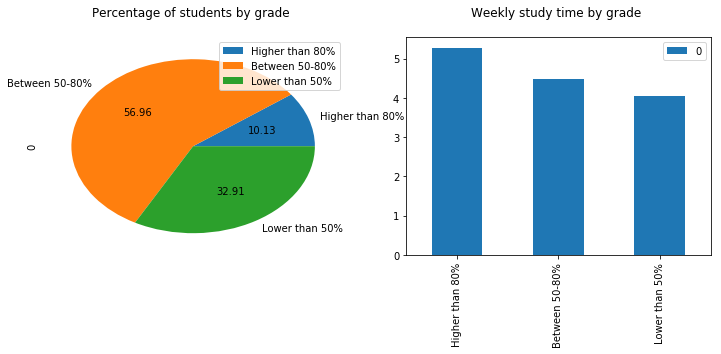

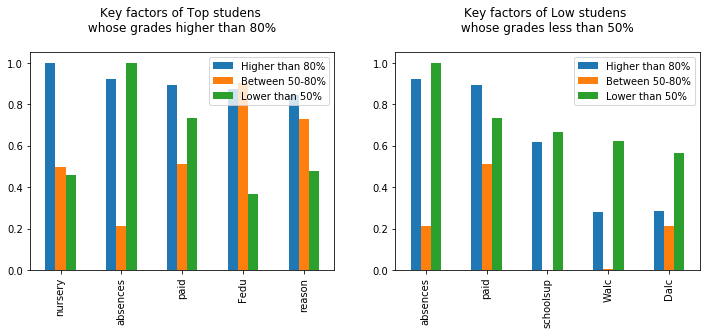

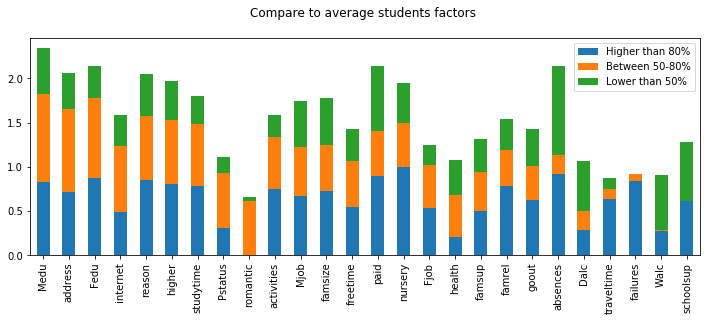

In [829]:
# reading data file of a student performance report
performance_report = StudentPerformanceReport(title='Math Student Performance Report', filename='./student_performance/student-mat.csv', sep=';')

# to perform analysis on a file data 
performance_report.performAnalysis()

# Print summary information of the report object to console
performance_report.generateSummary()

# Visualization
performance_report.drawGraphs()

# Part 2 - Predicting student final grade

## Importing libraries

In [851]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # for encoding categorical data
from sklearn.cross_validation import train_test_split # for splitting the dataset into the Training set and Test set
from sklearn.linear_model import LinearRegression # Linear regression

from sklearn.preprocessing import StandardScaler  # for feature Scaling

## Defining a class for predicting student final grade

In [922]:
#Used Multiple Linear Regression
class StudentFinalGradePredictionModel:
    def __init__(self, filename, sep=';'):
        self.filename = filename
        self.sep = sep
        
        #self.__buildingMLR()
        self.__buildingANN()
        pass

    def __buildingMLR(self):
        """Building the Multiple Linear Regression"""

        self.__dataPreprocessing()
        
        # Fitting Multiple Linear Regression to the Training set
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_train, self.y_train)
        
    def __buildingANN(self):

        self.__dataPreprocessing()
        
        #Initialising the ANN
        self.classifier = Sequential()

        #Adding the input layer and the first hidden layer with dropout
        self.classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim=self.X_train.shape[1]))
        self.classifier.add(Dropout(p=0.1))

        #Adding the second hidden layer
        self.classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))
        self.classifier.add(Dropout(p=0.1))

        #Adding the output layer
        self.classifier.add(Dense(output_dim=self.y_train.shape[1], init='uniform', activation='sigmoid'))

        #Compiling the ANN
        self.classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        #Fitting the ANN to the Training set
        self.classifier.fit(self.X_train, self.y_train, batch_size=10, nb_epoch = 100)
        
    
    def __dataPreprocessing(self):        
        """Data Preprocessing"""
        
        # Importing the dataset
        self.df = pd.read_csv(self.filename, sep=self.sep)
        X = self.df.iloc[:, 0:-1].values # all columns except 'G3' are input values
        y = self.df.iloc[:, -1].values # column 'G3' is output value

        # Encoding categorical data
        # Encoding the Independent Variable
        
        # Encoding categorical data
        columns_indices = []
        for column in self.df.select_dtypes(include=['object']).columns:
            columnIndex = self.__columnIndexByName(column)
            X[:, columnIndex] = LabelEncoder().fit_transform(X[:, self.__columnIndexByName(column)])
            columns_indices.append(columnIndex)
            
        #dummy variables
        onehotencoder = OneHotEncoder(categorical_features = columns_indices)
        X = onehotencoder.fit_transform(X).toarray()
        
        onehotencoder = OneHotEncoder(categorical_features = [0])
        y = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
        
            
        # Splitting the dataset into the Training set and Test set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        # Feature Scaling
        """
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        sc_y = StandardScaler()
        y_train = sc_y.fit_transform(y_train)"""
        
    def __columnIndexByName(self, column_name):
        i = 0
        for name in self.df.columns:
            if name == column_name:
                break
            i+=1
        return i
        
    def predictTestResultANN(self):
        
        y_pred = self.classifier.predict(self.X_test)
        #y_pred = (y_pred > 0.5)
        print(y_pred)
        
        
        # Making the Confusion Matrix
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(self.y_test, y_pred)
        #accuracy = ( cm[0][0] + cm[1][1] )/ len(self.y_test)


        return 0
        
    def predictTestResult(self):
    
        # Predicting the Test set results
        y_pred = self.regressor.predict(self.X_test)
        print(y_pred)
        y_pred = np.round(y_pred)
        
        
        count_correct = 0
        for i in range(len(y_pred)):
            if y_pred[i] == self.y_test[i]:
                count_correct += 1
                
        print(y_pred)
        print(self.y_test)
        accuracy = count_correct / len(y_pred) * 100
        return accuracy

    def predictStudentFinalGrade(self, studentInfo):
    
        # Predicting the user set results
        y_pred = self.regressor.predict(studentInfo)
        
        return y_pred


## Usage of StudentFinalGradePredictionModel class

In [923]:
final_grade_prediction = StudentFinalGradePredictionModel(filename='./student_performance/student-mat.csv', sep=';')
#test_accurity = final_grade_prediction.predictTestResult()
test_accurity = final_grade_prediction.predictTestResultANN()
print(test_accurity)
print('Variance score: {0:.2f}'.format(test_accurity))

/home/bb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=58, units=6, kernel_initializer="uniform")`
/home/bb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
/home/bb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
/home/bb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
/home/bb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=18, kernel_initializer="uniform")`
/home/bb/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The 

Epoch 1/100
316/316 [==============================] - 0s 1ms/step - loss: 2.8873 - acc: 0.0918
Epoch 2/100
316/316 [==============================] - 0s 234us/step - loss: 2.8673 - acc: 0.1297
Epoch 3/100
316/316 [==============================] - 0s 223us/step - loss: 2.7517 - acc: 0.1266
Epoch 4/100
316/316 [==============================] - 0s 257us/step - loss: 2.6355 - acc: 0.1361
Epoch 5/100
316/316 [==============================] - 0s 220us/step - loss: 2.6188 - acc: 0.1519
Epoch 6/100
316/316 [==============================] - 0s 260us/step - loss: 2.6111 - acc: 0.1424
Epoch 7/100
316/316 [==============================] - 0s 270us/step - loss: 2.6077 - acc: 0.1487
Epoch 8/100
316/316 [==============================] - 0s 262us/step - loss: 2.6121 - acc: 0.1519
Epoch 9/100
316/316 [==============================] - 0s 240us/step - loss: 2.5966 - acc: 0.1456
Epoch 10/100
316/316 [==============================] - 0s 255us/step - loss: 2.5970 - acc: 0.1456
Epoch 11/100
316/316 

316/316 [==============================] - 0s 222us/step - loss: 1.8479 - acc: 0.2595
Epoch 84/100
316/316 [==============================] - 0s 269us/step - loss: 1.8253 - acc: 0.2247
Epoch 85/100
316/316 [==============================] - 0s 244us/step - loss: 1.8370 - acc: 0.2532
Epoch 86/100
316/316 [==============================] - 0s 280us/step - loss: 1.8495 - acc: 0.2563
Epoch 87/100
316/316 [==============================] - 0s 237us/step - loss: 1.7830 - acc: 0.2627
Epoch 88/100
316/316 [==============================] - 0s 237us/step - loss: 1.7869 - acc: 0.2690
Epoch 89/100
316/316 [==============================] - 0s 218us/step - loss: 1.7808 - acc: 0.2563
Epoch 90/100
316/316 [==============================] - 0s 213us/step - loss: 1.7997 - acc: 0.2532
Epoch 91/100
316/316 [==============================] - 0s 228us/step - loss: 1.7771 - acc: 0.2563
Epoch 92/100
316/316 [==============================] - 0s 211us/step - loss: 1.7940 - acc: 0.2437
Epoch 93/100
316/316 [=

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

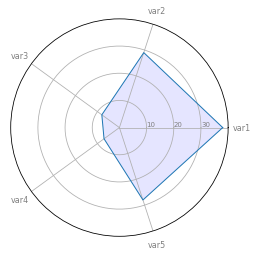

In [884]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

# number of variable
categories=list(df)[1:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


In [896]:
performance_report.student_dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
